In [27]:
import cv2

def align_sizes(img_real, img_fake):
    height, width, _ = img_fake.shape
    return cv2.resize(img_real, (height, width)), img_fake


In [58]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors


path_real = "./testB/22-14-0ECDDB-B-A719A8-B.ihc.HB.jpg"
path_fake = "./results/22-14-0ECDDB-B-A719A8-B.he.HB_fake.png"

img_real = cv2.imread(path_real)
img_fake = cv2.imread(path_fake)

img_real, img_fake = align_sizes(img_real, img_fake)

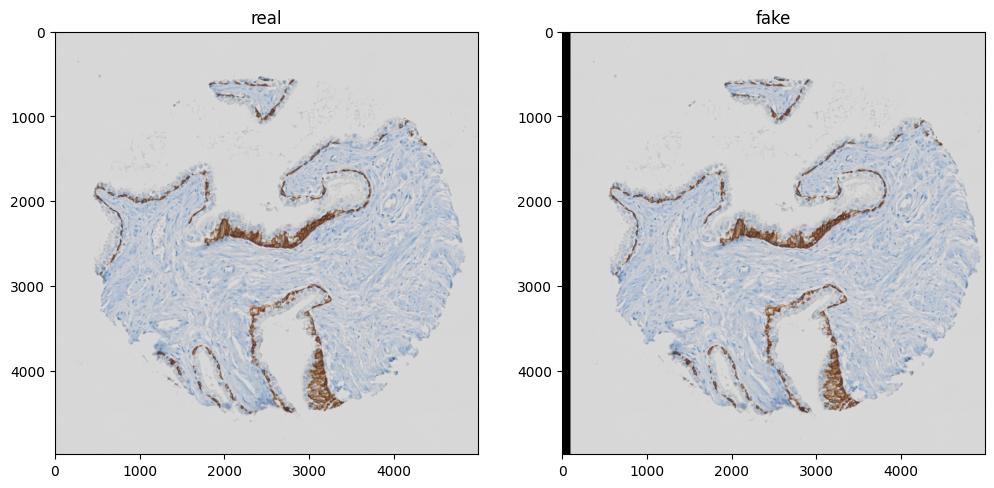

In [59]:
img_real_rgb =  cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB)
img_fake_rgb =  cv2.cvtColor(img_fake, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8), dpi= 100)

ax1.imshow(img_real_rgb)
ax1.set_title("real")
ax2.imshow(img_fake_rgb)
ax2.set_title("fake")

plt.show()

In [60]:
img_real_hsv =  cv2.cvtColor(img_real, cv2.COLOR_BGR2HSV)
img_fake_hsv =  cv2.cvtColor(img_fake, cv2.COLOR_BGR2HSV)

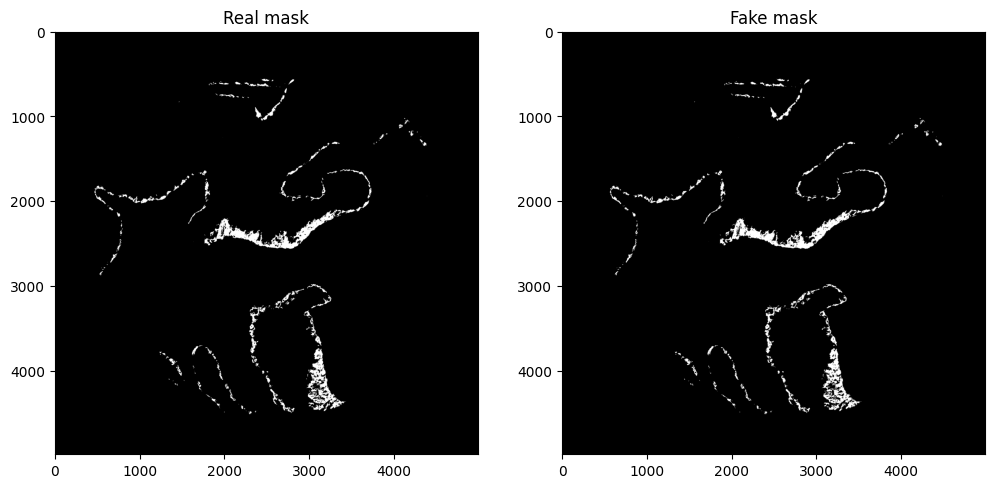

In [77]:
from matplotlib.colors import hsv_to_rgb

upper_brown = np.array([25, 255, 155], dtype=np.uint8)
lower_brown = np.array([1,1,1], dtype=np.uint8)

mask_real = cv2.inRange(img_real_hsv, lower_brown, upper_brown)
mask_fake = cv2.inRange(img_fake_hsv, lower_brown, upper_brown)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8), dpi= 100)

ax1.imshow(mask_real, cmap="gray")
ax1.set_title("Real mask")
ax2.imshow(mask_fake, cmap="gray")
ax2.set_title("Fake mask")

plt.show()

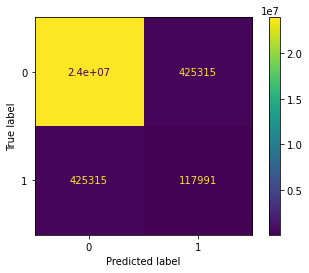

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mask_real = mask_real.flatten()
mask_fake = mask_fake.flatten()

mask_real[mask_real > 0] = 1
mask_fake[mask_fake > 0] = 1

confusion_matrix = confusion_matrix(mask_real, mask_fake)
TN, FP, FN, TP = confusion_matrix.ravel()

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
disp.plot()

In [72]:
from sklearn.metrics import classification_report

# print(classification_report(mask_real, mask_fake))

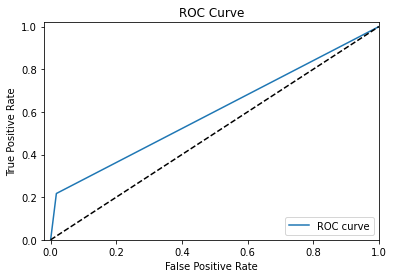

In [73]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(mask_real, mask_fake)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--',)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

plt.show()